# Linear Regression

Draws a "line of best fit" from the given dataset and use it to get the prediction (y) based on the input (x).

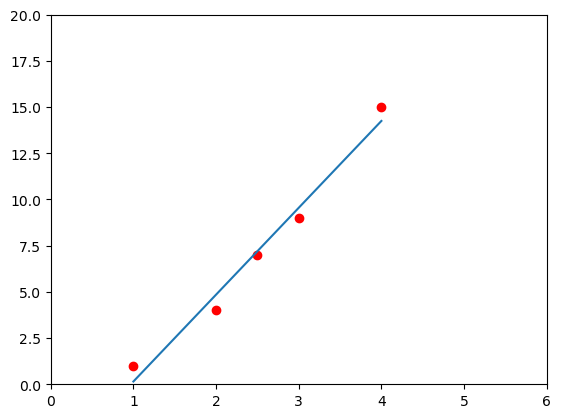

In [6]:
import matplotlib.pyplot as plt 
import numpy as np

x = [1, 2, 2.5, 3, 4]
y = [1, 4, 7, 9, 15]
plt.plot(x, y, 'ro') # ro = red circles
plt.axis([0, 6, 0, 20]) # x-axis from 0 to 6, y-axis from 0 to 20

# Draw a line of best fit
# np.polyfit(x, y, 1) performs a least suqares polynomial fit of degree 1 
# (a straight line) to the data and returns the coefficients, in this case [2.3, 1.7]
# np.poly1d creates a polynomial function from the coefficients
plt.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1))(np.unique(x)))
plt.show()

# Working with Data

In [7]:
from __future__ import absolute_import, division, print_function, unicode_literals

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import clear_output

import tensorflow as tf

print(tf.__version__)

2.12.0


In [8]:
# training data
dftrain = pd.read_csv('https://storage.googleapis.com/tf-datasets/titanic/train.csv')
# testing data
dfeval = pd.read_csv('https://storage.googleapis.com/tf-datasets/titanic/eval.csv')

y_train = dftrain.pop('survived')
y_eval = dfeval.pop('survived')

In [9]:
dftrain.head()

,sex,age,n_siblings_spouses,parch,fare,class,deck,embark_town,alone
0,male,22.0,1,0,7.2500,Third,unknown,Southampton,n
1,female,38.0,1,0,71.2833,First,C,Cherbourg,n
2,female,26.0,0,0,7.9250,Third,unknown,Southampton,y
3,female,35.0,1,0,53.1000,First,C,Southampton,n
4,male,28.0,0,0,8.4583,Third,unknown,Queenstown,y


In [12]:
y_train.head()


0    0
1    1
2    1
3    1
4    0
Name: survived, dtype: int64

In [13]:
dftrain.describe()

,age,n_siblings_spouses,parch,fare
count,627.000000,627.000000,627.000000,627.000000
mean,29.631308,0.545455,0.379585,34.385399
std,12.511818,1.151090,0.792999,54.597730
min,0.750000,0.000000,0.000000,0.000000
25%,23.000000,0.000000,0.000000,7.895800
50%,28.000000,0.000000,0.000000,15.045800
75%,35.000000,1.000000,0.000000,31.387500
max,80.000000,8.000000,5.000000,512.329200


In [16]:
dftrain["age"]

0      22.0
1      38.0
2      26.0
3      35.0
4      28.0
       ... 
622    28.0
623    25.0
624    19.0
625    28.0
626    32.0
Name: age, Length: 627, dtype: float64

In [17]:
dftrain.loc[0]

sex                          male
age                          22.0
n_siblings_spouses              1
parch                           0
fare                         7.25
class                       Third
deck                      unknown
embark_town           Southampton
alone                           n
Name: 0, dtype: object

In [15]:
dftrain.shape

(627, 9)

<Axes: >

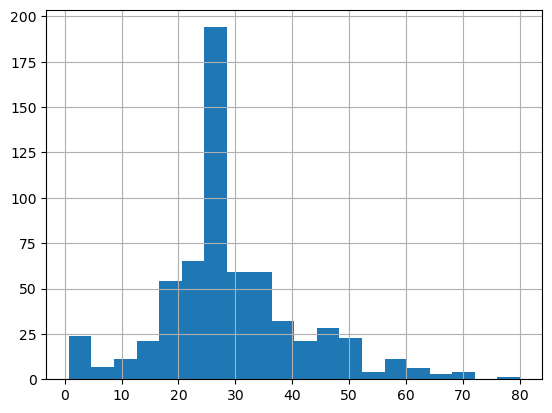

In [18]:
dftrain.age.hist(bins=20)

<Axes: ylabel='sex'>

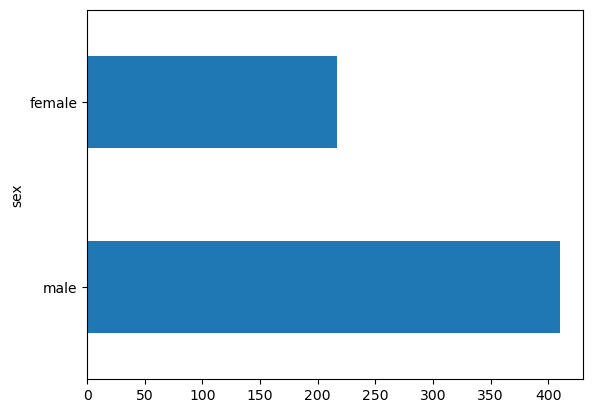

In [19]:

dftrain.sex.value_counts().plot(kind='barh') # horizontal bar plots

<Axes: xlabel='class'>

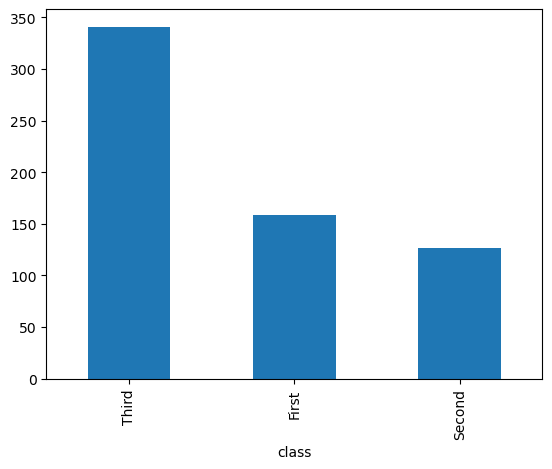

In [21]:
dftrain['class'].value_counts().plot(kind='bar')

Text(0.5, 0, '% survive')

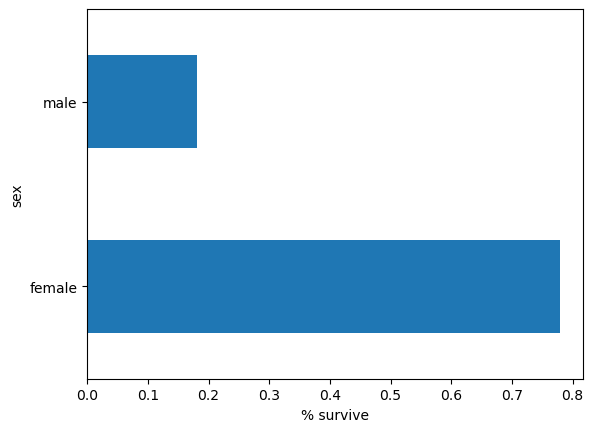

In [24]:
(dftrain
 .join(y_train)
 .groupby('sex')
 .survived
 .mean() # avg surival rate for each group
 .plot(kind='barh')
 .set_xlabel('% survive'))